___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

In [63]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, average_precision_score
from sklearn.metrics import make_scorer
from sklearn.compose import make_column_transformer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from yellowbrick.regressor import PredictionError
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from scipy.stats import skew
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (8,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [64]:
male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')
female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq', encoding='latin-1')

In [65]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [66]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [67]:
for i in female.columns:
    if i not in male.columns:
        print(i)

SubjectId


In [68]:
female.columns =female.columns.str.replace("SubjectId", "subjectid")
# female.rename({"SubjectId" : "subjectid"}, inplace=True)

In [69]:
print(male.shape)
print(female.shape)

(4082, 108)
(1986, 108)


In [70]:
df = pd.concat([female,male], ignore_index=True)
df.sample(20)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
5041,27305,281,1417,329,221,1297,246,191,409,334,277,495,76,331,316,139,1022,254,867,608,492,402,1476,278,1031,254,1270,848,630,346,33,61,17,220,762,103,260,335,301,569,469,1111,85,205,187,151,551,191,325,70,348,381,1071,590,441,462,491,547,500,67,417,120,399,445,1373,109,419,267,1155,357,136,869,865,589,1750,1718,1413,1117,646,182,778,462,127,887,1649,468,331,965,253,377,1026,818,165,837,Male,9-Dec-11,Fort Gordon,Army National Guard,Combat Support,254A,Wisconsin,1,NaN,1,39,68,180,Right hand
2006,10312,209,1450,340,228,1342,258,198,420,304,284,489,79,318,313,139,929,214,895,599,490,355,1520,296,1000,223,1276,863,638,386,36,61,23,254,832,106,275,353,288,517,488,1146,88,210,195,150,588,202,347,65,320,346,1056,680,417,442,495,552,492,70,367,121,377,414,1447,117,434,273,1125,379,159,949,918,600,1846,1780,1437,1097,553,166,812,481,132,918,1631,459,305,837,199,365,1076,714,187,840,Male,7-Oct-10,Fort Hood,Regular Army,Combat Arms,15T,Texas,1,NaN,1,28,71,165,Right hand
983,22083,210,1293,300,197,1193,217,176,360,286,250,424,61,314,283,130,957,215,807,567,465,348,1341,258,882,227,1089,756,621,343,28,59,19,239,737,88,237,306,266,468,420,962,73,183,176,142,559,188,308,68,337,407,958,585,360,389,426,495,456,56,409,116,324,362,1256,108,368,226,983,325,122,834,760,520,1626,1574,1276,1011,589,151,796,423,124,807,1472,400,263,785,182,321,951,582,146,770,Female,15-Aug-11,Fort Stewart,Army National Guard,Combat Service Support,92F,Germany,21,NaN,2,33,66,132,Right hand
1257,25595,202,1326,309,217,1225,233,181,397,290,289,454,72,308,277,133,1022,213,811,552,453,388,1396,269,959,251,1145,785,568,307,30,67,24,229,762,93,244,310,247,476,426,1035,80,196,182,145,544,193,307,69,355,396,998,595,358,395,451,518,480,64,406,111,321,366,1305,112,397,230,1030,326,157,875,813,537,1649,1620,1301,1053,602,163,716,447,121,833,1520,448,319,860,185,311,974,647,155,789,Female,14-Nov-11,Fort Gordon,Army National Guard,Combat Service Support,25B,Pennsylvania,1,NaN,1,21,64,135,Right hand
5546,28370,273,1484,350,210,1370,244,205,439,348,285,527,71,330,301,143,1057,247,903,631,523,384,1559,296,1066,258,1316,858,672,383,37,68,27,251,824,101,269,339,298,593,467,1150,87,210,187,151,565,199,332

## Explore Data

In [71]:
df.sample(20).T

,4700,3696,4054,2481,5415,5751,3176,280,601,6016,1424,2214,2266,1448,5038,3539,2914,1860,1827,4642
subjectid,26170,15982,17294,12440,28056,28777,14767,15009,17946,29318,25958,11231,11374,26002,27301,15415,14067,29018,28830,24894
abdominalextensiondepthsitting,195,274,229,195,273,265,284,229,245,227,189,274,250,231,234,244,256,235,271,184
acromialheight,1405,1492,1439,1495,1460,1304,1454,1315,1352,1476,1315,1447,1450,1272,1437,1338,1427,1260,1289,1403
acromionradialelength,332,351,356,361,341,287,329,296,320,349,322,343,332,307,317,298,328,302,289,340
anklecircumference,225,243,235,212,242,228,226,210,202,223,206,219,234,200,225,228,237,207,218,203
axillaheight,1305,1372,1332,1397,1327,1199,1336,1229,1273,1364,1219,1333,1348,1163,1330,1248,1323,1148,1190,1292
balloffootcircumference,259,269,241,230,274,252,237,249,248,258,223,261,264,222,244,240,237,230,216,243
balloffootlength,203,199,199,201,216,191,197,182,184,208,177,194,200,175,197,195,200,185,169,198
biacromialbreadth,415,398,393,408,450,400,423,366,395,407,362,402,409,330,417,423,441,372,357,396
bicepscircumferenceflexed,348,366,312,295,398,368,391,312,280,341,285,342,336,303,358,344,360,334,321,282


In [72]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [73]:
df.isna().sum().sum()

4647

In [74]:
df.duplicated().sum()

0

In [75]:
df["SubjectNumericRace"].value_counts(dropna=False)

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: SubjectNumericRace, dtype: int64

In [76]:
df["DODRace"].value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [77]:
df.drop(columns = ["SubjectNumericRace"], inplace = True)

In [78]:
df.drop(index= df[df["DODRace"]>=4].index, axis=0, inplace=True)

In [79]:
df.Date.value_counts(dropna=False)

5-Apr-12     43
5-Mar-12     43
28-Feb-12    42
26-May-11    40
6-Mar-12     40
21-Feb-12    40
26-Mar-12    39
27-Apr-11    39
27-Feb-12    39
29-Feb-12    39
15-Mar-11    39
8-Dec-10     38
3-Apr-12     38
30-Mar-11    38
2-Jun-11     38
23-Feb-12    38
1-Mar-12     37
20-Mar-12    36
13-Mar-12    36
28-May-11    36
7-Mar-12     36
2-Mar-12     35
18-Mar-11    35
21-Mar-11    35
21-Mar-12    35
16-Mar-12    34
30-Jan-11    33
8-Jun-11     33
11-Apr-11    33
15-Aug-11    33
27-May-11    33
24-Jan-12    33
28-Jan-12    32
24-Feb-12    32
25-Mar-12    32
8-Mar-12     31
20-Jan-11    31
16-Aug-11    31
7-Nov-11     31
8-Dec-11     31
26-Mar-11    31
17-Mar-11    31
31-Mar-11    30
25-Jan-12    30
25-Mar-11    30
12-Dec-11    29
19-Jan-12    29
18-Jan-11    29
17-Feb-12    29
19-Mar-12    29
31-Jan-12    29
27-Jan-12    29
16-Feb-12    29
5-Dec-11     29
7-Dec-11     28
15-Feb-12    28
15-Mar-12    28
7-Jun-11     28
12-Jul-11    28
12-Oct-11    28
5-Oct-11     28
14-Oct-10    28
14-Mar-1

In [80]:
df.drop(columns="Date", inplace=True)

In [81]:
df.isnull().sum().sum()

4644

In [82]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [83]:
df.Ethnicity.value_counts(dropna=False)

NaN                                                   4644
Mexican                                                356
Puerto Rican                                           183
Caribbean Islander                                     123
Cherokee                                                60
Dominican                                               32
Cuban                                                   17
Colombian                                               17
Arab or Middle Eastern                                  16
Salvadoran                                              16
Filipino                                                14
Japanese                                                12
Mexican Puerto Rican                                    10
Honduran                                                 9
Panamanian                                               9
Peruvian                                                 9
Dominican Puerto Rican                                  

In [84]:
df.Ethnicity.isnull().sum()/df.shape[0]*100

80.49921996879876

In [85]:
df.drop("Ethnicity",axis=1, inplace = True)

In [86]:
df.isna().sum().sum()

0

In [87]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].nunique())

Gender                        : 2
Installation                  : 12
Component                     : 3
Branch                        : 3
PrimaryMOS                    : 281
SubjectsBirthLocation         : 136
WritingPreference             : 3


In [88]:
df.DODRace.dtype

dtype('int64')

In [89]:
df.DODRace.unique()

array([2, 3, 1], dtype=int64)

In [90]:
df["DODRace"] = df["DODRace"].astype("string")

In [91]:
df["DODRace"].replace({"1": "White", "2": "Black", "3": "Hispanic"}, inplace = True)
df["DODRace"].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: Int64

In [92]:
df["PrimaryMOS"].value_counts()

11B     641
88M     308
92A     275
91B     224
68W     207
92Y     200
25U     193
42A     189
31B     187
25B     169
12B     154
13B     129
35D     121
19D     119
74D     118
92G     116
92F     114
35M     114
25Q     110
35F      81
91D      67
25S      63
25L      61
11C      50
19K      50
25N      47
25A      44
12N      38
91C      38
13D      37
13F      36
11A      36
94F      33
35G      33
92W      31
90A      30
94E      29
91J      29
91A      28
36B      26
91H      24
89B      24
21B      24
91L      22
68A      19
35T      19
88N      19
92S      18
25W      18
12C      17
68E      17
92M      17
12W      17
27D      17
11Z      17
15T      16
56M      16
91X      15
13A      15
35N      15
13R      14
68J      14
25P      14
14J      14
31E      14
15W      13
35L      13
68K      13
88Z      13
35P      12
70B      12
15P      12
91E      12
35X      11
88A      11
66H      11
351L     11
13Z      11
31A      11
25C      11
12R      10
14Z      10
14E      10
12Y 

In [93]:
df.drop(columns = ["PrimaryMOS"], inplace = True)

In [94]:
df["Installation"].value_counts()

Camp Shelby       1111
Fort Bliss         925
Fort Gordon        636
Camp Atterbury     432
Fort McCoy         432
Fort Hood          416
Fort Huachuca      404
Fort Bragg         373
Fort Drum          369
Fort Lee           356
Fort Stewart       314
Fort Rucker          1
Name: Installation, dtype: int64

In [95]:
df.drop(columns =["Installation"], inplace = True)

In [96]:
df["SubjectsBirthLocation"].value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
Florida                   210
Oklahoma                  205
Michigan                  194
Minnesota                 194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
Puerto Rico                88
New Jersey                 88
Missouri                   83
Maryland                   78
Colorado                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota               53
Arkansas  

In [97]:
df.Weightlbs.value_counts(dropna=False).sort_index()

0        1
86       1
88       1
90       1
95       3
96       1
98       1
100      5
101      1
102      2
103      6
104      2
105      8
106      3
107      2
108      5
109      3
110     20
111      4
112      6
113      3
114      8
115     21
116     16
117      8
118     18
119      6
120     49
121      5
122     12
123     12
124     18
125     53
126     14
127     33
128     34
129     11
130    100
131      9
132     25
133     21
134     16
135    117
136     18
137     30
138     43
139     18
140    146
141     18
142     27
143     32
144     17
145    140
146     13
147     33
148     55
149     18
150    216
151      6
152     31
153     41
154     30
155    154
156     31
157     31
158     46
159     12
160    203
161     22
162     35
163     28
164     21
165    194
166     19
167     35
168     53
169     32
170    224
171     19
172     32
173     34
174     35
175    204
176     24
177     26
178     52
179     18
180    219
181     26
182     31
183     31

In [98]:
df.drop(index=df[df.Weightlbs==0].index,axis=0, inplace=True)

In [99]:
df.Heightin.value_counts(dropna=False).sort_index()

56      1
57      5
58      4
59     30
60     72
61     89
62    208
63    249
64    368
65    299
66    522
67    485
68    511
69    605
70    551
71    536
72    468
73    283
74    232
75    114
76     68
77     36
78     15
79      5
80      7
81      2
86      1
87      1
94      1
Name: Heightin, dtype: int64

In [100]:
df["BMI"] = (df.Weightlbs/df.Heightin**2)*703

In [101]:
def bmi(x):
    if x <= 19.5:
        return 1
    elif (x > 19.5) and (x <= 25):
        return 2
    elif (x > 25) and (x <= 30):
        return 3
    elif (x > 30) and (x <= 35):
        return 4
    else:
        return 5

In [102]:
df["BMI_class"] = df.BMI.apply(bmi)

In [103]:
df.BMI_class.value_counts()

3    2644
2    2092
4     824
1     109
5      99
Name: BMI_class, dtype: int64

In [104]:
df.drop(columns=["Weightlbs","Heightin","BMI"], axis=1, inplace=True)

In [105]:
df.Component.value_counts()

Regular Army           2954
Army National Guard    2607
Army Reserve            207
Name: Component, dtype: int64

In [106]:
df.groupby("Component")["DODRace"].value_counts()

Component            DODRace 
Army National Guard  White       1855
                     Black        499
                     Hispanic     253
Army Reserve         White        114
                     Black         52
                     Hispanic      41
Regular Army         White       1823
                     Black        747
                     Hispanic     384
Name: DODRace, dtype: int64

In [107]:
df.Branch.value_counts()

Combat Service Support    3021
Combat Arms               1507
Combat Support            1240
Name: Branch, dtype: int64

In [108]:
df.groupby("Branch")["DODRace"].value_counts()

Branch                  DODRace 
Combat Arms             White       1146
                        Hispanic     188
                        Black        173
Combat Service Support  White       1911
                        Black        745
                        Hispanic     365
Combat Support          White        735
                        Black        380
                        Hispanic     125
Name: DODRace, dtype: int64

In [109]:
df.drop(["Branch","Component","subjectid"],axis=1,inplace=True)

In [110]:
df.reset_index(drop=True, inplace=True)

In [111]:
df.shape

(5768, 99)

In [112]:
df0 = df.copy()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [113]:
X = df.drop(columns = ["DODRace"])
y = df["DODRace"]

In [114]:
y.value_counts()

White       3792
Black       1298
Hispanic     678
Name: DODRace, dtype: Int64

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [116]:
print(f'{X_train.shape}\n{y_train.shape}\n{X_test.shape}\n{y_test.shape}')

(4614, 98)
(4614,)
(1154, 98)
(1154,)


In [117]:
X_train.select_dtypes("object").columns.to_list()

['Gender', 'SubjectsBirthLocation', 'WritingPreference']

In [118]:
cat_onehot = X_train.select_dtypes("object").columns.to_list()

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [119]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       remainder=MinMaxScaler())

In [120]:
operations = [("OneHot_Encoder", column_trans), ("logistic", LogisticRegression(class_weight="balanced",max_iter=10000,
                                                                          random_state=101))]

logistic_pipe = Pipeline(steps=operations)

In [121]:
logistic_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [122]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [123]:
eval_metric(logistic_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[241  12   7]
 [ 11 103  21]
 [ 10 104 645]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       260
    Hispanic       0.47      0.76      0.58       135
       White       0.96      0.85      0.90       759

    accuracy                           0.86      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 975   35   28]
 [  16  459   68]
 [  67  351 2615]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.86      0.91      3033

    accuracy                           0.88      4614
   macro avg       0.81      0.88      0.83      4614
weighted avg       0.91      0.88      0.89      4614



In [124]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_score_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [125]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.506050
train_precision_Hispanic    0.547309
test_recall_Hispanic        0.769844
train_recall_Hispanic       0.846221
test_f1_score_Hispanic      0.610125
train_f1_score_Hispanic     0.664682
dtype: float64

### Logistic Model GridsearchCV

In [126]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

param_grid = {
    "logistic__C": [0.5, 1, 1.3, 1.9],
    'logistic__penalty': ["l1", "l2"],
    'logistic__solver': ['liblinear', 'lbfgs'],
}

In [127]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

logistic_gridsCV = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
logistic_gridsCV.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                         

In [128]:
logistic_gridsCV.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('logistic',
                 LogisticRegression(C=1.3, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [129]:
logistic_gridsCV.best_params_

{'logistic__C': 1.3, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

In [130]:
pd.DataFrame(logistic_gridsCV.cv_results_).loc[logistic_gridsCV.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.777273
mean_train_score    0.847965
Name: 11, dtype: object

In [131]:
eval_metric(logistic_gridsCV, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [ 11 103  21]
 [  9 103 647]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93       260
    Hispanic       0.47      0.76      0.59       135
       White       0.96      0.85      0.90       759

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 974   35   29]
 [  17  459   67]
 [  62  352 2619]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.96      0.86      0.91      3033

    accuracy                           0.88      4614
   macro avg       0.81      0.88      0.83      4614
weighted avg       0.91      0.88      0.89      4614



as seen above when we fit the model taking into account recall_Hispanic, there is huge difference between precision, recall and f1_score. And also it's recommended to use 'liblinear' solver parameter when working with small data. So we can check the scores with f1_score_Hispanic

#### with f1_score of Hispanic

In [133]:
f1_score_Hispanic =  make_scorer(f1_score, average=None, labels=["Hispanic"])

param_grid = {
    "logistic__C": [0.1, 3.5, 10],
    'logistic__penalty': ["l1", "l2"],
    'logistic__solver': ['liblinear', 'lbfgs']}

In [134]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

logistic_gridsCV = GridSearchCV(model,
                              param_grid,
                              verbose=2,
                              scoring=f1_score_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)
logistic_gridsCV.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                         

In [135]:
logistic_gridsCV.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('logistic',
                 LogisticRegression(C=3.5, class_weight='balanced',
                                    max_iter=10000, random_state=101,
                                    solver='liblinear'))])

In [136]:
logistic_gridsCV.best_params_

{'logistic__C': 3.5,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [137]:
pd.DataFrame(logistic_gridsCV.cv_results_).loc[logistic_gridsCV.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score      0.67852
mean_train_score    0.726835
Name: 6, dtype: object

In [138]:
eval_metric(logistic_gridsCV, X_train, y_train, X_test, y_test)

Test_Set
[[244   5  11]
 [ 11  91  33]
 [  6  41 712]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94       260
    Hispanic       0.66      0.67      0.67       135
       White       0.94      0.94      0.94       759

    accuracy                           0.91      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 981   18   39]
 [  22  393  128]
 [  51  130 2852]]
              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.73      0.72      0.73       543
       White       0.94      0.94      0.94      3033

    accuracy                           0.92      4614
   macro avg       0.87      0.87      0.87      4614
weighted avg       0.92      0.92      0.92      4614



#### Cross Validate

In [139]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',max_iter=10000, 
                                                                    random_state=101,solver="liblinear", penalty="l2", C=3.5))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.677915
train_precision_Hispanic    0.726896
test_recall_Hispanic        0.683367
train_recall_Hispanic       0.726827
test_f1_score_Hispanic      0.678520
train_f1_score_Hispanic     0.726835
dtype: float64

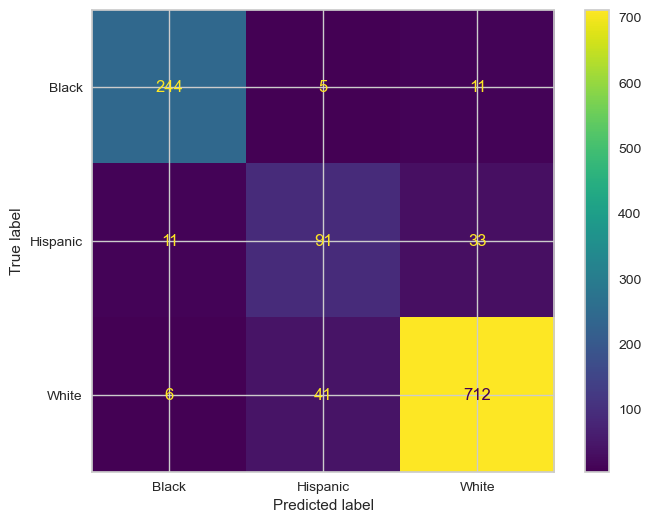

In [140]:
plot_confusion_matrix(logistic_gridsCV, X_test, y_test);

#### Precision Recall Curve

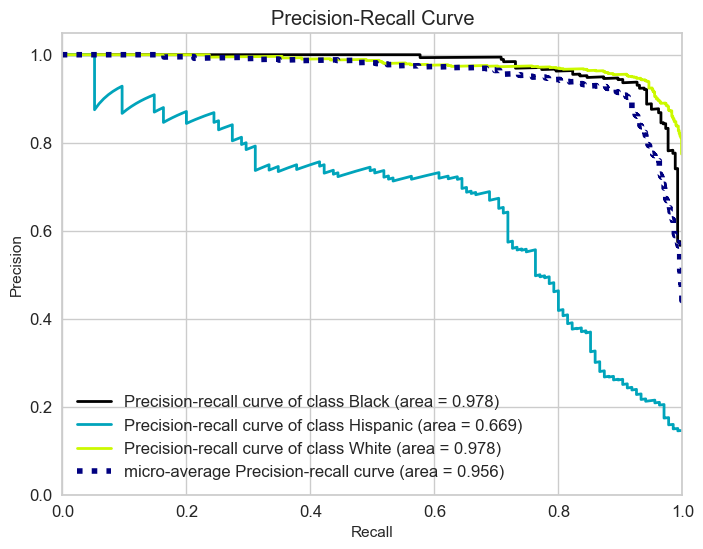

In [141]:
y_pred_proba = logistic_gridsCV.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [142]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.668780297742103

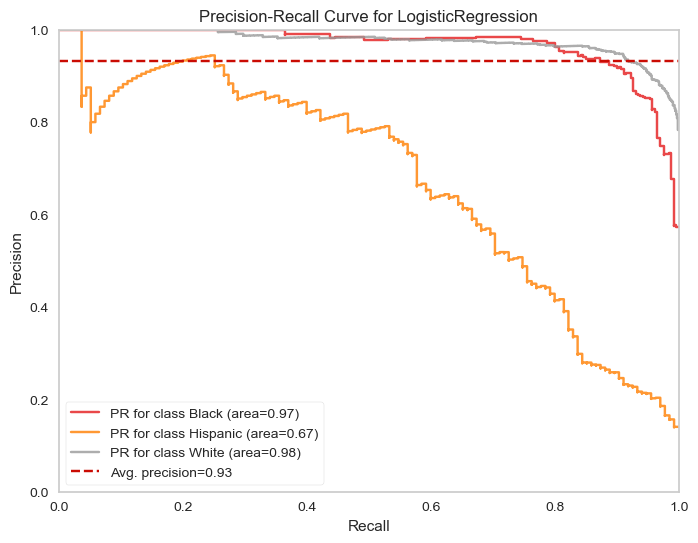

In [143]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("logistic_grid", LogisticRegression(class_weight='balanced',max_iter=10000, 
                                                random_state=101,solver="liblinear", penalty="l2", C=3.5))]

model = Pipeline(steps=operations)

visualizer = PrecisionRecallCurve(model,
      per_class=True, 
      classes= ["Black", "Hispanic", "White"],
      cmap="Set1")

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [144]:
y_pred = logistic_gridsCV.predict(X_test)

logistic_average_precision = visualizer.score_["Hispanic"]
logistic_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
logistic_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [193]:
from sklearn.svm import SVC

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), 
                                       remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans),  ("svc", SVC(class_weight="balanced",random_state=101))]

SVC_pipe = Pipeline(steps=operations)

SVC_pipe.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [194]:
eval_metric(SVC_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[239  12   9]
 [ 11  99  25]
 [ 13 105 641]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.46      0.73      0.56       135
       White       0.95      0.84      0.89       759

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 954   40   44]
 [  20  452   71]
 [  54  382 2597]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.52      0.83      0.64       543
       White       0.96      0.86      0.90      3033

    accuracy                           0.87      4614
   macro avg       0.80      0.87      0.82      4614
weighted avg       0.90      0.87      0.88      4614



In [196]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_score_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [197]:
operations = [("OneHotEncoder", column_trans),  ("svc", SVC(class_weight="balanced",random_state=101))]

scores = cross_validate(Pipeline(steps=operations), X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.473987
train_precision_Hispanic    0.516419
test_recall_Hispanic        0.755219
train_recall_Hispanic       0.833234
test_f1_score_Hispanic      0.581967
train_f1_score_Hispanic     0.637592
dtype: float64

###  SVC Model GridsearchCV

In [198]:
param_grid = {
    'svc__C': [1, 1.3, 2],
    'svc__gamma': ["scale", "auto", 0.01]}

In [200]:
f1_score_Hispanic =  make_scorer(f1_score, average=None, labels=["Hispanic"])

In [201]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

SVC_grid = GridSearchCV(Pipeline(steps=operations),
                              param_grid,
                              verbose=2,
                              scoring=f1_score_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

SVC_grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 1.3, 2]

In [202]:
SVC_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('svc', SVC(C=2, class_weight='balanced', random_state=101))])

In [203]:
SVC_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [204]:
pd.DataFrame(SVC_grid.cv_results_).loc[SVC_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.603099
mean_train_score    0.668571
Name: 6, dtype: object

In [205]:
eval_metric(SVC_grid, X_train, y_train, X_test, y_test)

Test_Set
[[243   9   8]
 [ 11 101  23]
 [ 12 105 642]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       260
    Hispanic       0.47      0.75      0.58       135
       White       0.95      0.85      0.90       759

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.87      1154


Train_Set
[[ 972   32   34]
 [  16  466   61]
 [  52  357 2624]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1038
    Hispanic       0.55      0.86      0.67       543
       White       0.97      0.87      0.91      3033

    accuracy                           0.88      4614
   macro avg       0.81      0.89      0.84      4614
weighted avg       0.91      0.88      0.89      4614



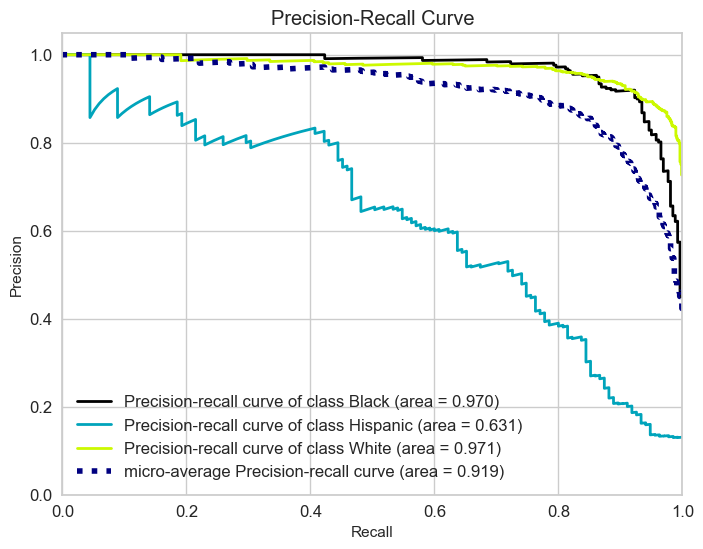

In [206]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

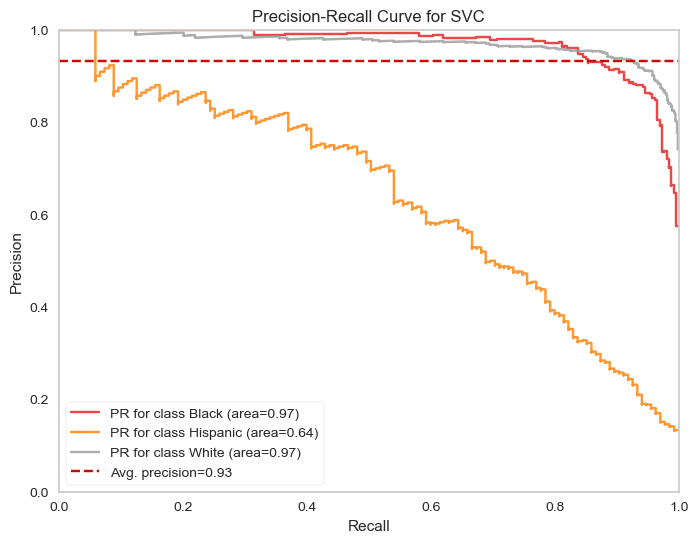

In [207]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

visualizer = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [209]:
y_pred = SVC_grid.predict(X_test)

svc_average_precision = visualizer.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [160]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_onehot), remainder='passthrough')

In [161]:
from sklearn.ensemble import RandomForestClassifier

operations = [("OrdinalEncoder", column_trans), ("RF_vanilla", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

RF_vanilla_model = Pipeline(steps=operations)

RF_vanilla_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('RF_vanilla',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [162]:
eval_metric(RF_vanilla_model, X_train, y_train, X_test, y_test)

Test_Set
[[181   0  79]
 [  7   4 124]
 [  8   1 750]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.79       260
    Hispanic       0.80      0.03      0.06       135
       White       0.79      0.99      0.88       759

    accuracy                           0.81      1154
   macro avg       0.84      0.57      0.58      1154
weighted avg       0.82      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



#### Cross Validate

In [163]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_score_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [164]:
operations = [("OrdinalEncoder", column_trans), ("RF_vanilla", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]
scores = cross_validate(Pipeline(steps=operations), X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.640476
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.040438
train_recall_Hispanic       1.000000
test_f1_score_Hispanic      0.075521
train_f1_score_Hispanic     1.000000
dtype: float64

#### RF Model GridsearchCV

In [165]:
param_grid = {'RF_vanilla__n_estimators':[100,400,800],
             'RF_vanilla__max_depth':[1,2,3],
             'RF_vanilla__max_features': ['auto', None, 20]}

f1_score_Hispanic =  make_scorer(f1_score, average=None, labels=["Hispanic"])

In [166]:
operations = [("OrdinalEncoder", column_trans), ("RF_vanilla", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

RF_grid = GridSearchCV(Pipeline(steps=operations),
                             param_grid,
                             verbose=2,
                             scoring=f1_score_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

RF_grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('RF_vanilla',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
   

In [167]:
RF_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('RF_vanilla',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=800, random_state=101))])

In [168]:
RF_grid.best_params_

{'RF_vanilla__max_depth': 3,
 'RF_vanilla__max_features': 'auto',
 'RF_vanilla__n_estimators': 800}

In [169]:
pd.DataFrame(RF_grid.cv_results_).loc[RF_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.308062
mean_train_score    0.335638
Name: 20, dtype: object

In [170]:
eval_metric(RF_grid, X_train, y_train, X_test, y_test)

Test_Set
[[201  38  21]
 [ 11  92  32]
 [ 63 284 412]]
              precision    recall  f1-score   support

       Black       0.73      0.77      0.75       260
    Hispanic       0.22      0.68      0.34       135
       White       0.89      0.54      0.67       759

    accuracy                           0.61      1154
   macro avg       0.61      0.67      0.59      1154
weighted avg       0.77      0.61      0.65      1154


Train_Set
[[ 799  162   77]
 [  52  366  125]
 [ 241 1149 1643]]
              precision    recall  f1-score   support

       Black       0.73      0.77      0.75      1038
    Hispanic       0.22      0.67      0.33       543
       White       0.89      0.54      0.67      3033

    accuracy                           0.61      4614
   macro avg       0.61      0.66      0.58      4614
weighted avg       0.78      0.61      0.65      4614



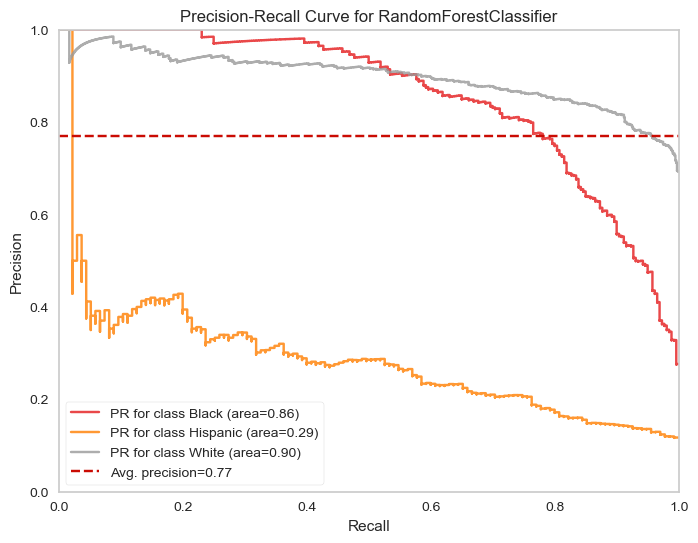

In [171]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OrdinalEncoder", column_trans), ("RF_grid", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=3, n_estimators=800, random_state=101))]


visualizer = PrecisionRecallCurve(
            Pipeline(steps=operations),
            per_class=True, 
            classes= ["Black", "Hispanic", "White"],
            cmap="Set1")

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [172]:
y_pred = RF_grid.predict(X_test)

RF_average_precision = visualizer.score_["Hispanic"]
RF_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
RF_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [173]:
from xgboost import XGBClassifier

operations = [("OrdinalEncoder", column_trans), ("XGB_vanilla", XGBClassifier(random_state=101))]

XGB_vanilla = Pipeline(steps=operations)

XGB_vanilla.fit(X_train, y_train)

[19:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_vanilla',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytre...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
       

In [174]:
from sklearn.utils import class_weight

In [175]:
class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
class_weights

array([0.50708869, 0.50708869, 0.50708869, ..., 0.50708869, 0.50708869,
       0.50708869])

In [176]:
class_weights_df = pd.DataFrame(class_weights, columns=["weights"], index = y_train.index)

class_weights_df["label"] = y_train
class_weights_df.head()

,weights,label
5203,0.507089,White
5392,0.507089,White
5527,0.507089,White
3860,0.507089,White
5735,0.507089,White


In [177]:
class_weights_df.groupby("label")["weights"].value_counts()

label     weights 
Black     1.481696    1038
Hispanic  2.832413     543
White     0.507089    3033
Name: weights, dtype: int64

In [178]:
XGB_vanilla.fit(X_train,y_train, XGB_vanilla__sample_weight=class_weights)

[19:33:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_vanilla',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytre...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
       

In [179]:
eval_metric(XGB_vanilla, X_train, y_train, X_test, y_test)

Test_Set
[[234   3  23]
 [ 14  55  66]
 [ 12  27 720]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       260
    Hispanic       0.65      0.41      0.50       135
       White       0.89      0.95      0.92       759

    accuracy                           0.87      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.87      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



#### Cross Validate

In [180]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_score_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [181]:
operations = [("OrdinalEncoder", column_trans), ("XGB_vanilla", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(
        model, 
        X_train, 
        y_train, 
        scoring = scoring, 
        cv = 5, return_train_score=True,
        fit_params={"XGB_vanilla__sample_weight":class_weights})

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[19:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

test_precision_Hispanic     0.703033
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.429120
train_recall_Hispanic       1.000000
test_f1_score_Hispanic      0.532159
train_f1_score_Hispanic     1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [182]:
param_grid = {"XGB_grid__n_estimators":[10, 20, 40],
              'XGB_grid__max_depth':[1,2, 3],
              "XGB_grid__learning_rate": [0.01, 0.05, 0.1],
              "XGB_grid__subsample":[0.8, 1],
              "XGB_grid__colsample_bytree":[0.4, 0.8, 2]}

In [183]:
operations = [("OrdinalEncoder", column_trans), ("XGB_grid", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

XGB_grid = GridSearchCV(model, 
                        param_grid, 
                        scoring=f1_score_Hispanic,
                        cv=5,
                        n_jobs = -1,
                        return_train_score=True)

XGB_grid.fit(X_train, y_train, XGB_grid__sample_weight=class_weights)

[19:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('XGB_grid',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                            

In [184]:
XGB_grid.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('XGB_grid',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0...
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
               

In [185]:
XGB_grid.best_params_

{'XGB_grid__colsample_bytree': 0.8,
 'XGB_grid__learning_rate': 0.1,
 'XGB_grid__max_depth': 3,
 'XGB_grid__n_estimators': 40,
 'XGB_grid__subsample': 1}

In [186]:
pd.DataFrame(XGB_grid.cv_results_).loc[XGB_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.459973
mean_train_score    0.578418
Name: 107, dtype: object

In [187]:
eval_metric(XGB_grid, X_train, y_train, X_test, y_test)

Test_Set
[[214  23  23]
 [ 13  88  34]
 [ 54 128 577]]
              precision    recall  f1-score   support

       Black       0.76      0.82      0.79       260
    Hispanic       0.37      0.65      0.47       135
       White       0.91      0.76      0.83       759

    accuracy                           0.76      1154
   macro avg       0.68      0.75      0.70      1154
weighted avg       0.81      0.76      0.78      1154


Train_Set
[[ 929   55   54]
 [  27  410  106]
 [ 149  464 2420]]
              precision    recall  f1-score   support

       Black       0.84      0.89      0.87      1038
    Hispanic       0.44      0.76      0.56       543
       White       0.94      0.80      0.86      3033

    accuracy                           0.81      4614
   macro avg       0.74      0.82      0.76      4614
weighted avg       0.86      0.81      0.83      4614



[19:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


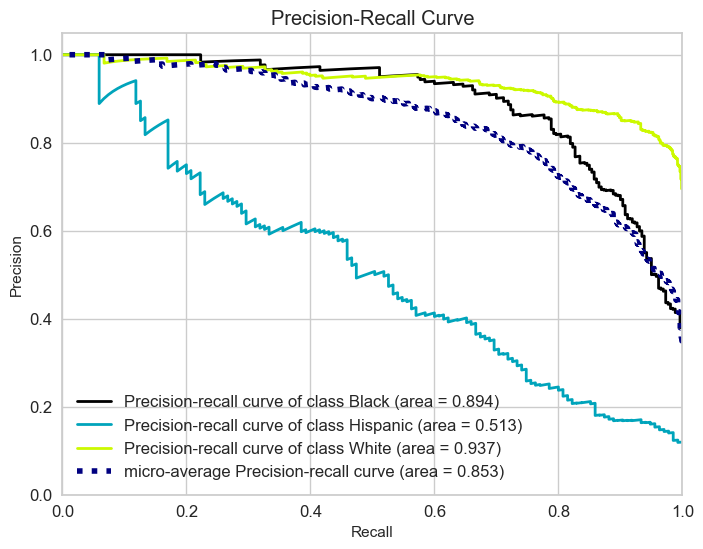

In [188]:
operations = [("OrdinalEncoder", column_trans), ("XGB_grid", XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, 
                                            max_depth=3, n_estimators=40, objective='multi:softprob', random_state=101,
                                            subsample=1))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train, XGB_grid__sample_weight=class_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [189]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5126311317768933

In [190]:
y_pred = XGB_grid.predict(X_test)

XGB_average_precision = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
XGB_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
XGB_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

### Choosing the best model

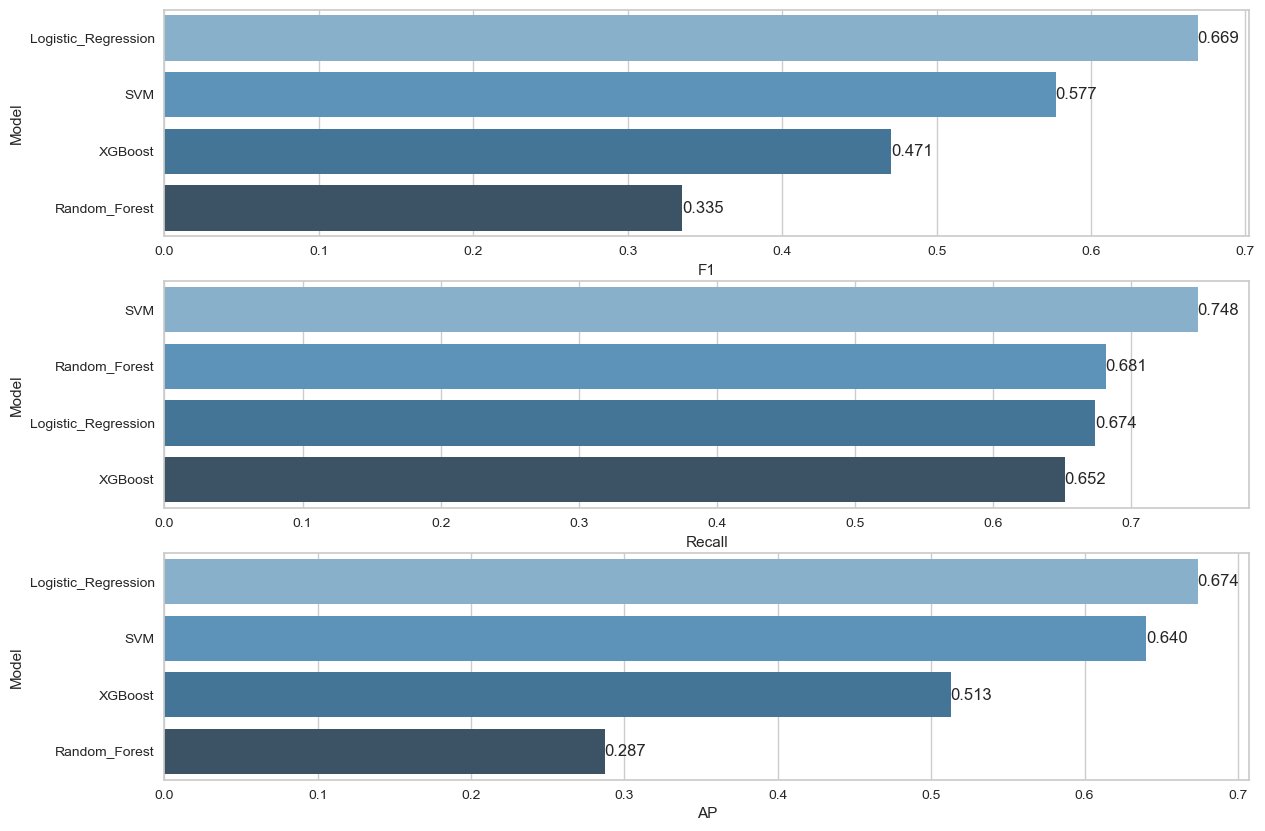

In [210]:
compare = pd.DataFrame({"Model": ["Logistic_Regression", "SVM",  "Random_Forest", "XGBoost"],
                        "F1": [logistic_f1[0], svc_f1[0], RF_f1[0], XGB_f1[0]],
                        "Recall": [logistic_recall[0], svc_recall[0], RF_recall[0], XGB_recall[0]],
                        "AP": [logistic_average_precision, svc_average_precision, RF_average_precision, XGB_average_precision]})

    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [251]:
import pickle
pickle.dump(logistic_gridsCV, open("final_logistic", 'wb'))

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [218]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [219]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=MinMaxScaler())
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("logistic_grid", LogisticRegression(max_iter=10000, 
            random_state=101,solver="liblinear", penalty="l2", C=3.5))]
smote_pipeline = imbpipeline(steps=operations)
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('logistic_grid',
                 LogisticRegression(C=3.5, max_iter=10000, random_state=101,
                                    solver='liblinear'))])

In [220]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[241   6  13]
 [ 10  89  36]
 [  6  40 713]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93       260
    Hispanic       0.66      0.66      0.66       135
       White       0.94      0.94      0.94       759

    accuracy                           0.90      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 966   19   53]
 [  18  389  136]
 [  33  115 2885]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94      1038
    Hispanic       0.74      0.72      0.73       543
       White       0.94      0.95      0.94      3033

    accuracy                           0.92      4614
   macro avg       0.88      0.87      0.87      4614
weighted avg       0.92      0.92      0.92      4614



In [221]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.685379
train_precision_Hispanic    0.733924
test_recall_Hispanic        0.672323
train_recall_Hispanic       0.719870
test_f1_Hispanic            0.676011
train_f1_Hispanic           0.726800
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [222]:
import shap

column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=MinMaxScaler())
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, 
            random_state=101,solver="liblinear", penalty="l2", C=3.5)
model_shap.fit(X_train_trans, y_train)

LogisticRegression(C=3.5, class_weight='balanced', max_iter=10000,
                   random_state=101, solver='liblinear')

In [223]:
features = column_trans_shap.get_feature_names_out()
new_features = [i.replace("onehotencoder__", "").replace("remainder__","") for i in features]

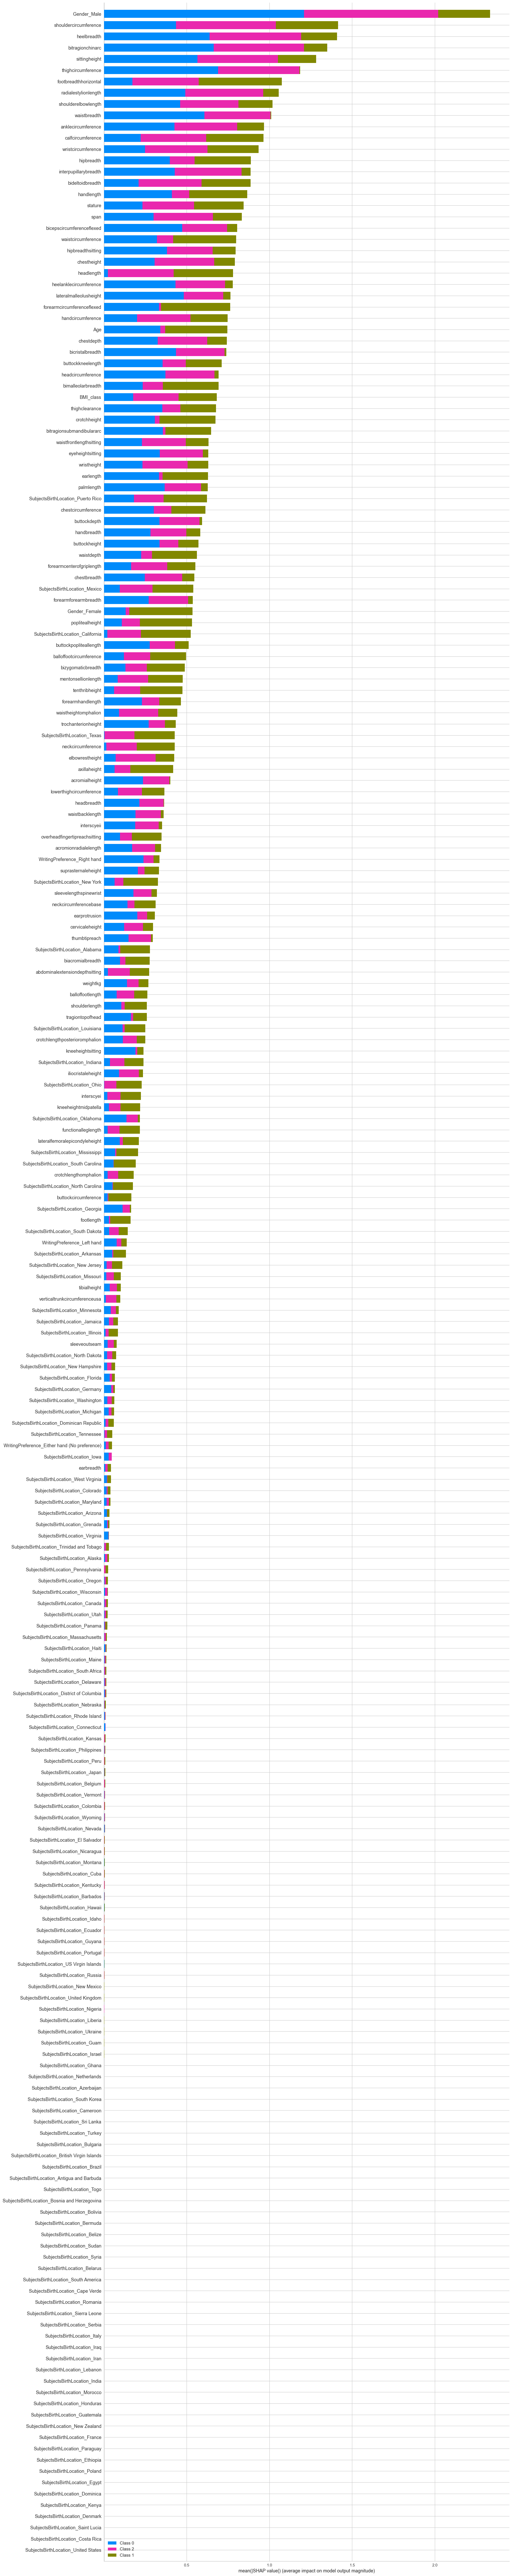

In [224]:
explainer = shap.LinearExplainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values,  max_display=300, feature_names = new_features, plot_size=(20,100))

In [225]:
hispanic=['Gender',  'SubjectsBirthLocation',  'footlength', 'buttockcircumference', 'hipbreadth', 'footbreadthhorizontal',
          'functionalleglength', 'interscyei', 'shoulderlength', 'poplitealheight', "handlength",
          'biacromialbreadth','overheadfingertipreachsitting', 'axillaheight','tenthribheight', 
          'crotchheight', 'Age', 'bimalleolarbreadth', 'forearmcircumferenceflexed', 'headlength', 'waistcircumference']

In [226]:
X2 = X[hispanic]
X2.head()

,Gender,SubjectsBirthLocation,footlength,buttockcircumference,hipbreadth,footbreadthhorizontal,functionalleglength,interscyei,shoulderlength,poplitealheight,handlength,biacromialbreadth,overheadfingertipreachsitting,axillaheight,tenthribheight,crotchheight,Age,bimalleolarbreadth,forearmcircumferenceflexed,headlength,waistcircumference
0,Female,Germany,246,1011,345,91,1028,363,148,362,184,373,1268,1180,1013,759,26,65,265,191,850
1,Female,California,249,893,315,91,1117,340,142,426,189,372,1389,1292,1107,835,21,64,247,180,708
2,Female,Texas,265,987,356,100,1060,345,164,398,195,397,1414,1271,1089,821,23,69,262,207,727
3,Female,District of Columbia,265,1012,337,97,1069,392,157,394,186,384,1329,1250,1065,804,22,68,309,206,923
4,Female,Texas,247,1281,448,88,1039,428,156,345,187,378,1350,1210,1030,726,45,67,260,181,1163


In [227]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [228]:
X2.shape

(5768, 21)

In [229]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [231]:
column_trans_shap2 = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), remainder=MinMaxScaler())

operations_shap2 = [("OneHotEncoder",column_trans_shap2),("logistic", LogisticRegression(class_weight='balanced',max_iter=10000, 
                                                            random_state=101,solver="liblinear", penalty="l2", C=3.5))]

pipe_shap_model2 = Pipeline(steps=operations_shap2)
pipe_shap_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))])),
                ('logistic',
                 LogisticRegression(C=3.5, class_weight='balanced',
                                    max_iter=10000, random_state=101,
                                    solver='liblinear'))])

In [232]:
eval_metric(pipe_shap_model2, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[210   5  45]
 [  9  81  45]
 [ 68  48 643]]
              precision    recall  f1-score   support

       Black       0.73      0.81      0.77       260
    Hispanic       0.60      0.60      0.60       135
       White       0.88      0.85      0.86       759

    accuracy                           0.81      1154
   macro avg       0.74      0.75      0.74      1154
weighted avg       0.81      0.81      0.81      1154


Train_Set
[[ 841   38  159]
 [  32  345  166]
 [ 225  229 2579]]
              precision    recall  f1-score   support

       Black       0.77      0.81      0.79      1038
    Hispanic       0.56      0.64      0.60       543
       White       0.89      0.85      0.87      3033

    accuracy                           0.82      4614
   macro avg       0.74      0.77      0.75      4614
weighted avg       0.82      0.82      0.82      4614



In [233]:
model = Pipeline(steps=operations_shap2)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.541068
train_precision_Hispanic    0.563519
test_recall_Hispanic        0.604145
train_recall_Hispanic       0.641816
test_f1_Hispanic            0.569417
train_f1_Hispanic           0.600018
dtype: float64

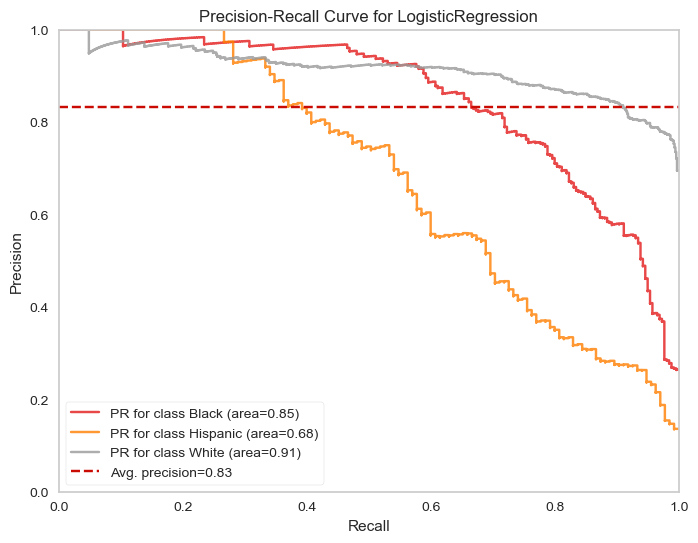

In [234]:
from yellowbrick.classifier import PrecisionRecallCurve

model = Pipeline(steps=operations_shap2)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

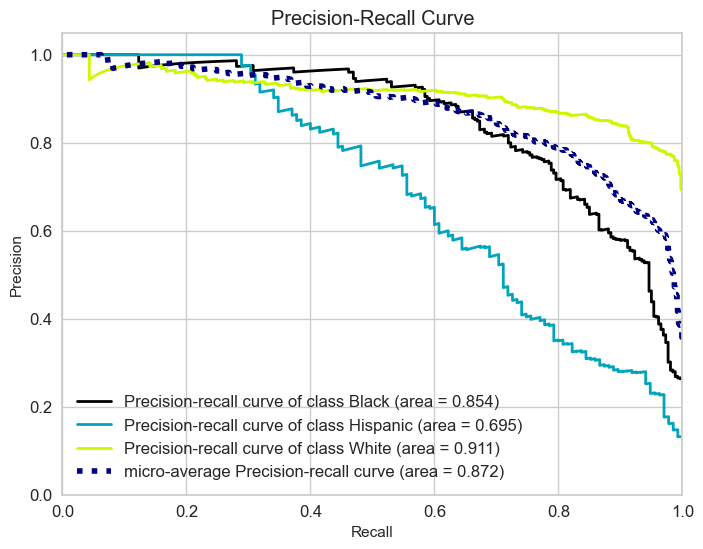

In [235]:
model = Pipeline(steps=operations_shap2)

model.fit(X_train2, y_train2)

decision_function = model.decision_function(X_test2)
    
plot_precision_recall(y_test2, decision_function)
plt.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8, stratify = y)

In [238]:
cat_onehot = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot), remainder=MinMaxScaler())

In [239]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [240]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',max_iter=10000, 
                                                random_state=101,solver="liblinear", penalty="l2", C=3.5))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('logistic',
                 LogisticRegression(C=3.5, class_weight='balanced',
                                    max_iter=10000, random_state=101,
                                    solver='liblinear'))])

In [242]:
X[X.Gender=="Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,BMI_class
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,255.452796,1442.941508,335.821190,229.590816,1331.097742,252.167009,201.229605,416.003848,358.567984,275.632632,510.917907,74.844023,331.652899,315.718317,142.436634,1021.287583,246.360698,889.501026,619.218317,504.001796,392.427142,1519.419446,289.784248,1060.494356,254.392252,1293.037199,847.634941,623.130323,356.350949,36.094407,64.169831,23.110826,244.817342,804.881478,101.893279,271.573114,349.572858,310.524115,580.687532,480.928425,1132.134941,88.379682,212.571832,193.510262,154.183684,574.702925,199.758338,344.004105,72.565931,346.252950,379.943561,1063.409697,639.947409,431.396870,450.631606,489.365829,555.221396,492.625449,73.062596,409.675218,122.681632,398.184967,435.152642,1428.472807,116.611596,430.681375,268.314007,1179.898923,364.307081,149.834017,918.674448,897.179579,594.011544,1816.634428,1758.383787,1440.700616,1122.443048,626.329656,180.738584,813.087224,469.222422,131.116470,902.585172,1666.783992,478.019497,327.111852,943.047204,238.563366,388.019497,1058.235249,858.708312,176.170344,848.755003,30.169574,2.913545
std,37.299184,62.364159,17.283285,14.581268,58.721766,12.894991,10.330682,19.077257,34.508680,17.514655,32.448691,4.097577,13.971408

In [243]:
male_mean = X[X.Gender=="Male"].describe(include="all").loc["mean"]
male_mean

abdominalextensiondepthsitting     255.452796
acromialheight                    1442.941508
acromionradialelength               335.82119
anklecircumference                 229.590816
axillaheight                      1331.097742
balloffootcircumference            252.167009
balloffootlength                   201.229605
biacromialbreadth                  416.003848
bicepscircumferenceflexed          358.567984
bicristalbreadth                   275.632632
bideltoidbreadth                   510.917907
bimalleolarbreadth                  74.844023
bitragionchinarc                   331.652899
bitragionsubmandibulararc          315.718317
bizygomaticbreadth                 142.436634
buttockcircumference              1021.287583
buttockdepth                       246.360698
buttockheight                      889.501026
buttockkneelength                  619.218317
buttockpopliteallength             504.001796
calfcircumference                  392.427142
cervicaleheight                   

In [245]:
male_mean["Gender"] = "Male"
male_mean["Component"] = "Regular Army"
male_mean["Branch"] = "Combat Support"
male_mean["WritingPreference"] = "Right hand"

In [246]:
pd.DataFrame(male_mean).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference,BMI_class,Component,Branch
mean,255.452796,1442.941508,335.82119,229.590816,1331.097742,252.167009,201.229605,416.003848,358.567984,275.632632,510.917907,74.844023,331.652899,315.718317,142.436634,1021.287583,246.360698,889.501026,619.218317,504.001796,392.427142,1519.419446,289.784248,1060.494356,254.392252,1293.037199,847.634941,623.130323,356.350949,36.094407,64.169831,23.110826,244.817342,804.881478,101.893279,271.573114,349.572858,310.524115,580.687532,480.928425,1132.134941,88.379682,212.571832,193.510262,154.183684,574.702925,199.758338,344.004105,72.565931,346.25295,379.943561,1063.409697,639.947409,431.39687,450.631606,489.365829,555.221396,492.625449,73.062596,409.675218,122.681632,398.184967,435.152642,1428.472807,116.611596,430.681375,268.314007,1179.898923,364.307081,149.834017,918.674448,897.179579,594.011544,1816.634428,1758.383787,1440.700616,1122.443048,626.329656,180.738584,813.087224,469.222422,131.11647,902.585172,1666.783992,478.019497,327.111852,943.047204,238.563366,388.019497,1058.235249,858.708312,176.170344,848.755003,Male,NaN,30.169574,Right hand,2.913545,Regular Army,Combat Support


In [247]:
model.predict(pd.DataFrame(male_mean).T)

array(['White'], dtype=object)

In [248]:
from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.818905539996991

In [249]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8186247544204323

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___